In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

WE HAVE IMPORTED ALL THE NECESSARY LIBRARIES

In [2]:
df=pd.read_csv('../input/smsspam/SMSSpamCollection',sep='\t',names=["labels","message"])
df['message'].size

5572

In [3]:
df

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


The first col is whether any message is spam or not and second is the message itself

In [4]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [6]:
corpus=[]
wordnet=WordNetLemmatizer()

LEMMATIZER...It converts the word to its root form.

In [7]:
for i in range(0,(df['message'].size)):
    review=re.sub('[^a-zA-Z]',' ',df['message'][i])
    review=review.lower()
    review=review.split()
    review=[wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

TEXT PREPROCESSING:
1)REMOVING ALL SPECIAL CHARACTERS EXCEPT ALPHABETS
2)CONVERTING ALL TO LOWER CASE
3)SPLITTIN THE DATA4)LEMMATIZATION


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=5000)
X=tf.fit_transform(corpus).toarray()

VECTORIZING THE CORPUS

In [9]:
X.shape
# 5572 sentences with 5000 unique words(limited words )

(5572, 5000)

In [10]:
y=pd.get_dummies(df['labels']) #converting labels to 1 and 0...categorical
y=y.iloc[:,1] #we only need one of the two columns

In [11]:
y.shape

(5572,)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.33,random_state=42)

In [13]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(x_train,y_train)


In [14]:
predicted=model.predict(x_test)

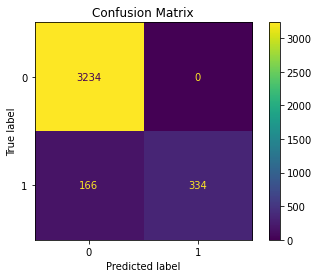

In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
conf_m=confusion_matrix(y_test,predicted,labels=model.classes_)
cm=ConfusionMatrixDisplay(confusion_matrix=conf_m,display_labels=model.classes_)
cm.plot()
plt.title("Confusion Matrix")
plt.show()

accuracy=accuracy_score(y_test,predicted)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3234
           1       1.00      0.67      0.80       500

    accuracy                           0.96      3734
   macro avg       0.98      0.83      0.89      3734
weighted avg       0.96      0.96      0.95      3734

